<a href="https://colab.research.google.com/github/Coreight98/Paran_ajou_Project_Anything/blob/main/%EC%9D%B4%EC%96%B4%EB%B3%B4%EC%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision.models as models
import torch.nn as nn
GoogleNet = models.googlenet(pretrained=True)
GoogleNet.fc = nn.Linear(in_features=1024, out_features=38)
GoogleNet

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import PIL
import time
from sklearn.neighbors import KNeighborsClassifier
import random
import torch

Mounted at /content/drive


In [4]:
train_location = './drive/MyDrive/data/DTD/'

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

class PatternDataset():
    def __init__(self, image, mode, transforms):
        super().__init__()
        self.image = image
        self.mode = mode
        self.transforms = transforms

    def __getitem__(self, index):
        image_name = self.image[index]
        image = Image.open(train_location + image_name)
        image = image.resize((224,224))
        #레이블 입력
        label = 1
        label = torch.tensor(label,dtype=torch.long)
        #이미지 변형 적용용
        image = self.transforms(image)
        return image, label

    def __len__(self):
        return len(self.image)
    def ind(index):
      image=self.image[index]
      return image


In [6]:
if __name__ == '__main__':
    device ='cuda'
    if device == 'cuda':
      torch.cuda.manual_seed_all(777)
    SEED = 777
    seed_everything(SEED)
    #데이터 셋 불러오고 정규화
    transform = transforms.Compose(
        [transforms.ToTensor(),
          transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
          ]
    )
    train_images = os.listdir(train_location)
    train_dataset = PatternDataset(train_images, mode='train', transforms=transform)
    trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=False, num_workers=0)
    
    net=GoogleNet
    net = torch.load('./drive/MyDrive/data/DTD_save/GoogleNet_save.pth')
    net.eval()
    X = np.load('./drive/MyDrive/data/DTD_save/DTD_features.npy')
    X = np.reshape(X,(4180,38))
    Y = np.zeros((4180,1))
    Y = np.reshape(Y,(4180,1))
    reg = KNeighborsClassifier(n_neighbors=4)
    reg.fit(X,Y)
    
    img = PIL.Image.open('./drive/MyDrive/data/DTD/braided_0078.jpg') ##################여기가 input image입니다요
    img = img.resize((224,224))
    emp = torch.empty((1,3,224,224),dtype=torch.float32)
    img_t =transform(img)
    emp[0] = img_t
    input = net(emp)
    neighbor_index= reg.kneighbors(input.detach().numpy(),n_neighbors=4,return_distance=False)
    # print(neighbor_index)
    neighbor_index.sort()
    
    id=0
    img = torch.empty((4,3,224,224))
    for ind in neighbor_index[0]:
      img[id][0] = train_dataset[ind][0][0]
      id+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


braided_0078.jpg


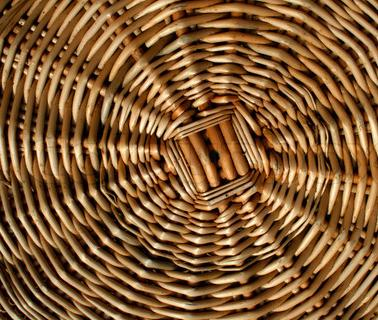

braided_0110.jpg


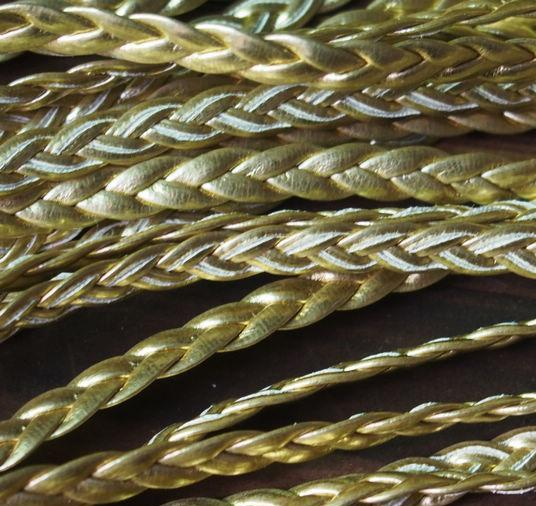

braided_0140.jpg


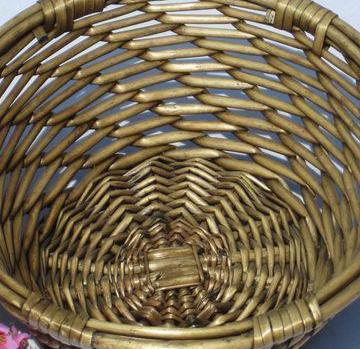

braided_0194.jpg


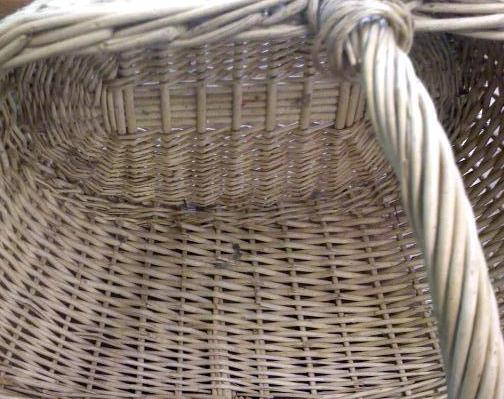

In [7]:
##### 아웃풋 이미지 4장 출력 #####
from IPython.display import Image 
for ind in neighbor_index[0]:
  print(train_images[ind])
  name='./drive/MyDrive/data/DTD/%s'%(train_images[ind])
  img=Image(name)
  display(img)
  # print(name)
from PIL import Image